In [1]:
import cv2
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.5.3
19.22.1


In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

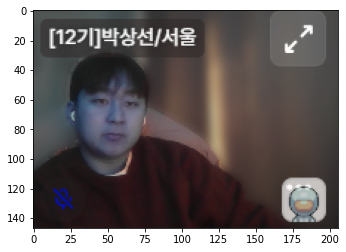

In [3]:
my_image_path = os.getenv('HOME')+'/aiffel/AIFFEL_quest_rs/Exploration/Ex03/images/myface.png' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)  # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show()  # 이미지를 출력해준다. (실제 출력)

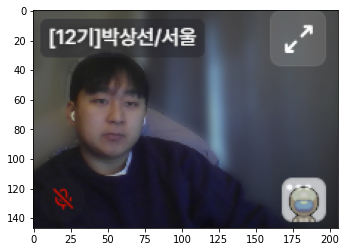

In [4]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [5]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

In [6]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(31, 50) (74, 94)]]


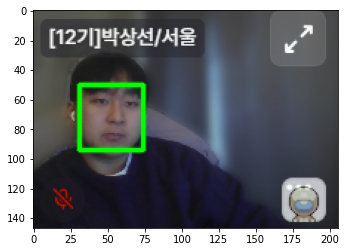

In [7]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


- $ wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2  
- $ mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/AIFFEL_quest_rs/Exploration/Ex03/models  
- $ cd ~/aiffel/AIFFEL_quest_rs/Exploration/Ex03 && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2  


In [8]:
model_path = os.getenv('HOME')+'/aiffel/AIFFEL_quest_rs/Exploration/Ex03/models/shape_predictor_68_face_landmarks.dat'
# 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
# dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
# landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
# dlib.rectangle: 내부를 예측하는 박스
# dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄


In [9]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


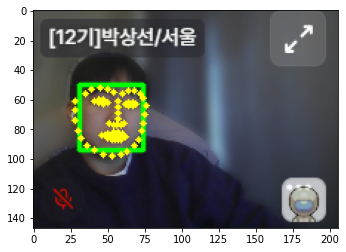

In [10]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [11]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
print(list_landmarks)
# - [[(28, 61), (28, 67), (28, 74), (30, 81), (32, 86), (36, 91), (41, 94), (47, 97), (53, 98), (59, 97), (63, 95), (68, 91), (71, 87), (73, 81), (74, 76), (75, 70), (76, 64), (35, 56), (39, 53), (45, 52), (50, 53), (54, 55), (60, 56), (64, 54), (68, 54), (72, 56), (74, 59), (57, 61), (57, 65), (57, 69), (57, 73), (51, 76), (54, 77), (56, 77), (59, 77), (61, 76), (41, 61), (44, 60), (47, 60), (50, 62), (47, 63), (44, 62), (62, 63), (64, 62), (67, 62), (69, 63), (67, 64), (64, 64), (46, 84), (50, 83), (54, 82), (56, 83), (57, 82), (60, 83), (62, 85), (59, 87), (57, 87), (55, 87), (53, 87), (50, 86), (48, 84), (53, 84), (55, 84), (57, 84), (60, 85), (57, 84), (55, 85), (53, 84)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2  
    w = h = dlib_rect.width()
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

[[(28, 61), (28, 67), (28, 74), (30, 81), (32, 86), (36, 91), (41, 94), (47, 97), (53, 98), (59, 97), (63, 95), (68, 91), (71, 87), (73, 81), (74, 76), (75, 70), (76, 64), (35, 56), (39, 53), (45, 52), (50, 53), (54, 55), (60, 56), (64, 54), (68, 54), (72, 56), (74, 59), (57, 61), (57, 65), (57, 69), (57, 73), (51, 76), (54, 77), (56, 77), (59, 77), (61, 76), (41, 61), (44, 60), (47, 60), (50, 62), (47, 63), (44, 62), (62, 63), (64, 62), (67, 62), (69, 63), (67, 64), (64, 64), (46, 84), (50, 83), (54, 82), (56, 83), (57, 82), (60, 83), (62, 85), (59, 87), (57, 87), (55, 87), (53, 87), (50, 86), (48, 84), (53, 84), (55, 84), (57, 84), (60, 85), (57, 84), (55, 85), (53, 84)]]
(57, 73)
(x,y) : (57,51)
(w,h) : (44,44)


In [12]:
# sticker_path = os.getenv('HOME')+'/aiffel/AIFFEL_quest_rs/Exploration/Ex03/images/cat_whiskers.png' # 고양이 수염의 경로
# img_sticker = cv2.imread(sticker_path) 

# img_sticker = cv2.resize(img_sticker, (w,h)) 
# print (img_sticker.shape) 

# # 이미지가 (44, 44, 3) 형식이므로 RGBA 형식으로 변환
# image = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2BGRA)

# image[..., 3] = np.where((image[..., 0] == 255) & (image[..., 1] == 255) & (image[..., 2] == 255), 0, image[..., 3])

# # 알파 채널을 제거하여 (44, 44, 3) 형식으로 변환
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)
# img_sticker = cv2.resize(image_rgb, (w,h)) 
# print (img_sticker.shape) 

In [13]:
sticker_path = os.getenv('HOME')+'/aiffel/AIFFEL_quest_rs/Exploration/Ex03/images/cat_whiskers.png' # 고양이 수염 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 고양이 수염의 차원 확인


(44, 44, 3)


In [14]:
# # x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# # x는 이미지에서 코 부위의 x값 = 57
# # y는 이미지에서 코 부위의 y값 = 51
# # w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 44
# # h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 44
refined_x = x - w // 2 -1 # 57- (44/2) = 57-22 = 35
refined_y = y + 2 # 
# # 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# # 즉, refined_x, refined_y값에서 시작됨
print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (34,53)


In [15]:
# # 왕관 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# # 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (34,53)


In [16]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.

sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]
img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker == 255, sticker_area, img_sticker).astype(np.uint8)

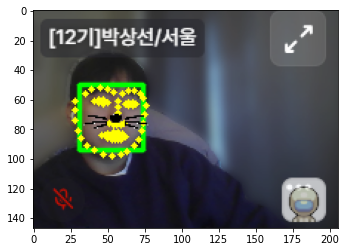

In [17]:
# 수염 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역과 랜드마크를 미리 적용해놓은 img_show에 고양이 수염 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

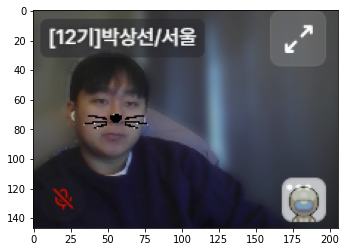

In [18]:
# # 위에서 설명했으므로 생략
# sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# # img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
# img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
#     np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
# plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
# plt.show()

sticker_area_original = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker == 255, sticker_area_original, img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 문제점 발견! 
1. 고양이 수염 위치를 적절한 곳에 두기 위해 여러 가지 좌표 수정.

2. 고양이 수염 스티커 배경이 희색이라는 이슈가 생겨, 투명화하는 작업 진행!
    - 잘 안됨..?
    - np.where에서 값 수정해주기....


